# Homework09

Exercises to practice dimensionality reduction with PCA

## Goals

- Add unsupervised pre-processing to our ML flow: encode -> normalize -> pre-process -> train -> evaluate
- Build an intuition for PCA and when/how to use it
- Understand the benefits of dimensionality reduction

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework.

In [24]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/image_utils.py
!wget -q https://github.com/PSAM-5020-2025S-A/Homework07/raw/main/Homework07_utils.pyc

!wget -qO- https://github.com/PSAM-5020-2025S-A/5020-utils/releases/latest/download/0801-500.tar.gz | tar xz

In [25]:
import PIL.Image as PImage

from os import listdir, path

from data_utils import PCA, RandomForestClassifier

from image_utils import get_pixels, make_image

from Homework07_utils import CamUtils

## PCA and Classification

Let's practice doing some more image classification with `PCA` and analyzing the results.

The dataset is the same one we used in `Homework07`. It has images from $25$ different security cameras, and our task is to separate them by camera. Some of the cameras move, some of them don't, and there are more than $1000$ images, so there's no way we want to do this by hand.

Let's start by loading the training images into a list of pixels, like we did with the `faces` dataset in class.

### Loading Data

If we look at the images in `./data/image/0801-500/train/`, we'll notice that they are named and organized in a slightly different way. They're all in the same directory and the first part of their filename specifies which camera they came from. Even though those `ids` are numbers, they're not sequential, so we'll use some helper functions to extract a unique `label` from their filenames.

This is exactly what the `OrdinalEncoder` class does, but since we only have to encode this one column, we'll do it by hand while we read the files in.

In [26]:
# this creates a list of all the files in a given directory, that end in .jpg
train_files = [f for f in listdir("./data/image/0801-500/train") if f.endswith(".jpg")]

In [27]:
# TODO: check and see what is inside the list here
print(train_files)

['17-85.jpg', '26-29.jpg', '07-11.jpg', '13-47.jpg', '23-73.jpg', '27-15.jpg', '11-94.jpg', '21-51.jpg', '02-48.jpg', '09-48.jpg', '23-28.jpg', '23-41.jpg', '25-71.jpg', '24-09.jpg', '07-75.jpg', '18-31.jpg', '10-50.jpg', '26-16.jpg', '07-31.jpg', '09-62.jpg', '21-08.jpg', '26-61.jpg', '17-66.jpg', '27-47.jpg', '13-56.jpg', '21-60.jpg', '05-15.jpg', '02-36.jpg', '31-20.jpg', '31-08.jpg', '15-30.jpg', '18-10.jpg', '02-14.jpg', '22-00.jpg', '26-35.jpg', '09-04.jpg', '26-50.jpg', '01-38.jpg', '10-43.jpg', '22-53.jpg', '10-48.jpg', '18-29.jpg', '15-22.jpg', '07-85.jpg', '17-81.jpg', '24-52.jpg', '18-21.jpg', '28-69.jpg', '02-21.jpg', '23-64.jpg', '23-51.jpg', '06-30.jpg', '31-21.jpg', '19-30.jpg', '02-40.jpg', '07-15.jpg', '10-61.jpg', '18-03.jpg', '08-35.jpg', '19-37.jpg', '05-42.jpg', '05-49.jpg', '21-15.jpg', '05-25.jpg', '15-07.jpg', '12-06.jpg', '27-05.jpg', '17-54.jpg', '08-50.jpg', '08-22.jpg', '22-14.jpg', '02-06.jpg', '27-45.jpg', '01-33.jpg', '12-00.jpg', '23-46.jpg', '28-67.jpg'

Now we'll read the image pixels and extract their labels. `CamUtils.get_label()` is the helper function we'll use to "encode" and return a label id based on the filename.

In [28]:
pixel_data = []
label_data = []

for fname in train_files:
  label = CamUtils.get_label(fname)
  img = PImage.open(path.join("./data/image/0801-500/train", fname))
  pixel_data.append(get_pixels(img))
  label_data.append(label)

In [29]:
# TODO: check if labels got extracted correctly by looking at 
#       the first few items of the label list and the filename list

print(train_files[-10:])
print(label_data[-10:])

['01-39.jpg', '23-48.jpg', '19-74.jpg', '01-40.jpg', '27-20.jpg', '05-40.jpg', '06-17.jpg', '05-21.jpg', '31-05.jpg', '17-40.jpg']
[0, 18, 15, 0, 22, 3, 4, 3, 24, 13]


Like in `Homework07`, the labels and the filenames won't match exactly since labels start at $0$ and the filenames start at $01$ and skip some numbers.

We can open some images from pixels, just to make sure we loaded them correctly:

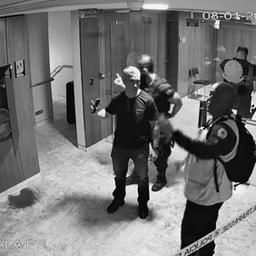

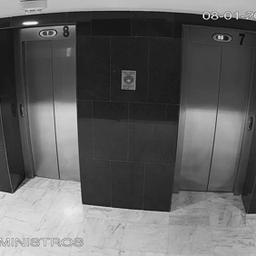

In [30]:
display(make_image(pixel_data[0], width=256))
display(make_image(pixel_data[10], width=256))

### PCA

Create a `DataFrame` called `cam_pca_df` by running `PCA` on the list of pixel data, just like we did in class, and then append a `label` column to it, just like we did in Homewokr07 with: `train_df["label"] = label_data`.

You can change how many components to extract from the images later, but for this first run just use $10$ components so we can compare classification with $10$ `PCA` components to the classification with $10$ random features from `Homework07`.  Make sure to confirm how much of the `variance` is preserved by this transformation.

In [31]:
# TODO: run PCA, get DataFrame
cam_pca = PCA(n_components=15)

cam_pca_df = cam_pca.fit_transform(pixel_data)

# TODO: add "label" column
cam_pca_df["label"] = label_data


# TODO: print variance
print(cam_pca.explained_variance())



# TODO: take a look at the first 5 rows
print(cam_pca_df.head())

0.8504224096056314
           PC0          PC1          PC2          PC3          PC4  \
0  1211.783230   877.945502 -2586.613110  5250.305551  2018.252775   
1  4362.018543  -249.771418  3036.742720  3715.018330  -845.729388   
2 -2187.666720 -8270.230054  9307.806825 -6118.796975 -3623.729122   
3 -4669.555572 -5856.007913   289.554543  5548.766835 -2111.406863   
4  1670.591181 -6361.599954 -3268.298514  8846.542068  1572.842846   

           PC5          PC6          PC7          PC8          PC9  \
0  1691.885140   760.709648  1184.203232   444.458760   157.115455   
1   602.731088 -2545.029643 -3608.100826  -183.738995   140.840500   
2 -1108.252391 -2116.141154  3221.048910 -2980.645599 -4233.290460   
3 -2685.842775  4713.121090  4217.375664  -511.428886  2085.052897   
4  6545.545256  3806.843722 -1329.320920 -1578.316223 -2953.080686   

          PC10         PC11         PC12         PC13         PC14  label  
0 -1300.755135 -1529.436723  1255.153178 -2048.169253   148.583

### Interpretation

<span style="color:hotpink">
How many components did you keep ?<br>
Did you try different numbers ?<br>
What percent of variance is kept by this transformation?
</span>

I tried 5, 10, and 15. The variance went up as n_components went up. The variance goes up roughly 10 points per 5 components. 

### Reconstruct

Before we go run our classification, let's take a look at some reconstructed images, just to make sure they make sense.

Take a look at reconstructed versions of images $0$, $10$, and whichever other images you might have opened above.

We did this in class. It involves a `inverse_transform()` function.

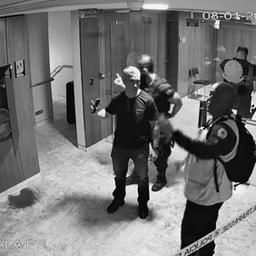

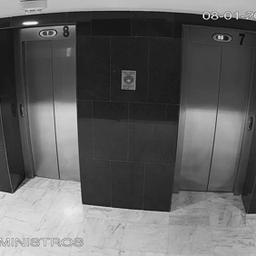

In [32]:
# TODO: reconstruct image at index 0
# Reconstruction: un-projects the data from PCA space into pixel space
pca_pixels = cam_pca.inverse_transform(cam_pca_df)

display(make_image(pixel_data[0]))
# display(make_image(pca_pixels.loc[0])

display(make_image(pixel_data[10] ))
# display(make_image(pca_pixels.loc[110], width=92))

The reconstructed images should look blurrier and noisier than the original ones, but they should still look something like the original ones.

### Classify !

Train a `RandomForestClassifier` on the `PCA` data.

Remember to separate the output feature (`label`) from the input features (`PC0`, `PC1`, etc).

In [33]:

# TODO: create a classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=1010)

# TODO: split input and output features
NUM_FEATURES = 10
chosen_columns = cam_pca_df.columns[:NUM_FEATURES]
train_features = cam_pca_df[chosen_columns]
out_features = cam_pca_df["label"]


# TODO: fit the model
model_rf.fit(train_features, out_features)
# TODO: run predictions
train_predictions = model_rf.predict(train_features)


### Measure Error

For the train set we could use the generic `classification_error()` function that we've used before because we have the true labels for each file, but for measuring accuracy for our `test` set classification, which has secret labels, we have to use a more specific function from the `CamUtils` class.

The function is called `classification_accuracy()` and it takes $2$ parameters, a list of filenames and the predicted labels associated with those filenames.

The result is an accuracy score ratio, between $0.0$ and $1.0$.

We can run this function on the `train` set as well:

In [34]:
# train_files is the list of files we got way up above
CamUtils.classification_accuracy(train_files, train_predictions)

1.0

### Interpretation

<span style="color:hotpink">
What does this mean?<br>
Should we expect the same result from the test dataset?<br>
Why, or why not?
</span>

It was totally accurate! The model perfectly predicted the train set. On test I imagine this will be different. If it's not, we've overfit, I think.

### Run on Test set

Now we'll open the image files inside the `./data/image/0801-500/test/` directory, using almost the exact same steps as we did above to create a `DataFrame` with the exception that we don't have labels for these images.

In [35]:
# TODO: create a list of files in the test/ directory
test_files = []
test_files = [f for f in listdir("./data/image/0801-500/test") if f.endswith(".jpg")]

# TODO: check its length and content
print(test_files)
print(len(test_files))

['15930604.jpg', '15087941.jpg', '11041879.jpg', '7801356.jpg', '16081810.jpg', '15607015.jpg', '15970794.jpg', '13257950.jpg', '12768655.jpg', '12299185.jpg', '16001568.jpg', '13324163.jpg', '7975967.jpg', '15310104.jpg', '8084282.jpg', '11153847.jpg', '16298992.jpg', '7400043.jpg', '15140688.jpg', '10530762.jpg', '5904696.jpg', '14824123.jpg', '15136883.jpg', '11043080.jpg', '5761154.jpg', '7466697.jpg', '8749482.jpg', '15101399.jpg', '13381055.jpg', '12046646.jpg', '10268450.jpg', '10501297.jpg', '8342291.jpg', '15568184.jpg', '14180061.jpg', '9216331.jpg', '7047777.jpg', '15616852.jpg', '8621057.jpg', '5883528.jpg', '14478345.jpg', '9145785.jpg', '8345236.jpg', '8677158.jpg', '5396560.jpg', '13683087.jpg', '15586568.jpg', '10034975.jpg', '9382355.jpg', '12949574.jpg', '10653850.jpg', '8814918.jpg', '13439245.jpg', '16028393.jpg', '6125784.jpg', '15623336.jpg', '15693395.jpg', '8129813.jpg', '12075833.jpg', '9252911.jpg', '7826965.jpg', '11588211.jpg', '15934002.jpg', '5417360.jpg',

We'll use a similar loop to extract the pixel information from these images, except we don't have `label` data, just pixels.

In [36]:
test_pixel_data = []

for fname in test_files:
  img = PImage.open(path.join("./data/image/0801-500/test", fname))
  test_pixel_data.append(get_pixels(img))

print(test_pixel_data[0])

[44, 45, 45, 44, 42, 40, 41, 42, 41, 42, 40, 37, 38, 41, 39, 34, 38, 42, 43, 42, 43, 45, 41, 34, 44, 42, 40, 40, 42, 43, 43, 42, 46, 45, 44, 44, 46, 46, 45, 44, 42, 40, 39, 40, 42, 44, 44, 44, 43, 40, 39, 42, 42, 39, 40, 43, 42, 41, 41, 41, 42, 42, 40, 38, 41, 41, 42, 43, 43, 44, 45, 45, 43, 47, 39, 45, 41, 32, 44, 46, 45, 45, 45, 46, 46, 47, 47, 47, 48, 48, 48, 47, 47, 46, 46, 46, 43, 43, 44, 45, 45, 46, 47, 47, 53, 53, 52, 51, 51, 50, 49, 49, 38, 49, 46, 44, 46, 37, 85, 77, 79, 79, 80, 80, 81, 82, 83, 83, 85, 85, 85, 85, 87, 88, 90, 91, 91, 92, 93, 94, 94, 94, 94, 93, 97, 86, 35, 37, 39, 51, 48, 47, 38, 30, 23, 20, 23, 26, 25, 22, 17, 22, 19, 17, 23, 21, 17, 23, 21, 21, 21, 22, 22, 23, 23, 23, 24, 16, 44, 45, 40, 49, 39, 46, 37, 39, 39, 32, 23, 15, 13, 14, 5, 29, 41, 34, 24, 22, 44, 78, 69, 66, 56, 46, 47, 48, 31, 8, 21, 26, 30, 31, 31, 32, 31, 28, 33, 34, 35, 37, 39, 40, 42, 42, 47, 39, 38, 115, 161, 131, 112, 122, 33, 8, 19, 17, 9, 74, 76, 69, 74, 84, 64, 73, 74, 70, 100, 99, 97, 1

Now we can run `PCA` and the `RandomForestClassifier`.

Since those are already trained, all we have to do is run their `transform()` function on the data.

In [37]:
# TODO: run PCA on test pixels, get DataFrame
#       this is the same PCA that was created above, not a new one

# cam_pca = PCA(n_components=10)
cam_pca_df_test = cam_pca.transform(test_pixel_data)

print(cam_pca.explained_variance())

print(cam_pca_df_test.head())

0.8504224096056314
            PC0           PC1          PC2          PC3          PC4  \
0   7166.916657  -2230.432172  -592.206182 -3539.488303   797.400801   
1  -6449.471573 -10682.853373  -399.683231   698.741229  1198.503152   
2   1390.983714  -6805.453427 -3202.595546  8883.050946  1711.767971   
3  10696.730467   3121.184602 -2466.046658 -2909.594857  5450.765359   
4   5184.319182  -2798.520442  3858.740320 -1083.675141 -2973.958855   

           PC5          PC6          PC7          PC8          PC9  \
0   314.641521  1258.068308 -2755.908527 -1591.414361   609.010196   
1 -4964.707547  5167.321228   707.803955  1778.692830   388.722140   
2  6295.566816  3733.317190 -1654.604569 -1589.040918 -2867.151008   
3 -3751.230919  1897.351258   261.464040  2476.378105   454.999298   
4 -1498.084726 -2475.280013   692.191531  -910.924562  4922.689173   

          PC10         PC11         PC12         PC13         PC14  
0  -642.851064  1169.551082   467.653818 -2243.428882 -150

It's always a good idea to check the result of the `PCA` transformation by looking at the `DataFrame` and reconstructing some images.

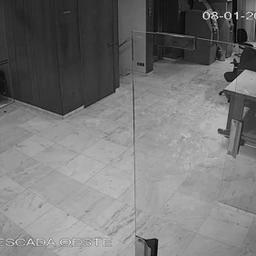

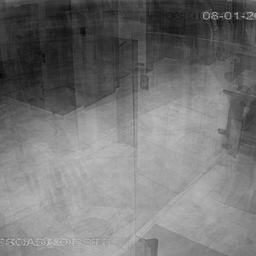

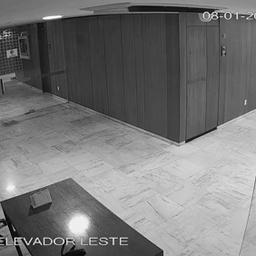

        0           1           2           3           4           5      \
0   80.869865   85.196230   87.720174   85.751356   94.352345  107.084819   
1   21.193202   17.770652   15.162699   14.961146   14.631590    9.778963   
2  182.730591  181.532763  182.937153  180.684948  177.865379  176.362655   
3   70.764282   70.138569   65.438565   64.807185   69.794968   70.022889   
4  127.449385  122.080215  118.968940  127.313029  123.419639  119.865768   

        6           7           8           9      ...       65526  \
0  109.450071  106.195648  104.712823  104.122207  ...  125.444706   
1    8.124636   11.374473   10.055299   14.706814  ...  140.935404   
2  174.111471  175.766984  174.241107  171.782329  ...  175.688685   
3   68.635956   64.646400   67.158917   72.139890  ...  178.402862   
4  122.096785  122.711412  127.596318  129.738242  ...  165.602062   

        65527       65528       65529       65530       65531       65532  \
0  123.931875  120.378591  120.860169  

In [38]:
# TODO: reconstruct one or two images
pca_pixels_test = cam_pca.inverse_transform(cam_pca_df_test)
display(make_image(test_pixel_data[0]))
display(make_image(pca_pixels_test.loc[0], width=256))
display(make_image(test_pixel_data[15]))

# TODO: take a look at the first 5 rows
print(pca_pixels_test.head())

### Interpretation

<span style="color:hotpink"><br>
The reconstructed images from the `test` set will always be noisier than the `train` images.<br><br>
Why?<br><br>
</span>

Because PCA model was trained on the training data. So it creates patterns, but the test set will introduce new patterns, creating noise where the model varies. 



Run the classifier and get predicted labels. Then get its accuracy ratio is by running the `CamUtils.classification_accuracy()` function with the list of filenames and list of predictions.

In [39]:
# TODO: run classifier. This is the same classifier already fitted on the train data above

NUM_FEATURES = 10
chosen_columns = cam_pca_df_test.columns[:NUM_FEATURES]
test_features = cam_pca_df_test[chosen_columns]

# Generate predictions with the already fitted model
test_predictions = model_rf.predict(test_features)

# TODO: get accuracy
CamUtils.classification_accuracy(test_files, test_predictions)

0.9211697393515575

### Interpretation

<span style="color:hotpink">
What's the accuracy ? How could we improve that if we wanted ?<br>
How does this compare to the classification model from <code>Homework07</code>? They can both be tuned to perform well, but how many features did we need last time in order to get an accuracy comparable to this?
</span>

First time I did this I accidentally refit it. WHOOPS. 

Accuracy is 92. I imagine we could improve with more components. Or since we're using randomForest, more trees with different depth (would need to run more tests to ensure not overfitting!)